# O estado de espírito influencia a cor da roupa que escolhemos vestir?





In [2]:
#@title
# Data Loading
import gspread
import pandas as pd
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt

from google.colab import drive
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) 
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1LankCXzy4b6WPwBdDJ4furKaB7UA5QoP2TL7yDu_TRk/edit?usp=sharing') # use this when you have the complete url (the edit#gid means permission)
sheet =  spreadsheet.get_worksheet(0)
df = pd.DataFrame(sheet.get_all_records())


In [3]:
#@title

df.rename(columns={df.columns[3]: "Estado de espírito",
          df.columns[4]: "Tom",
          df.columns[5]: "Armário"}, inplace=True)

df["Tom"] = df["Tom"].apply(lambda x: x.split("(")[0].strip())

def change_name(x):
  x_split =  x.split("), ")
  all = []
  for el in x_split:
    if "frios" in el.lower():
      all.append("Tons frios")
    elif "quentes" in el.lower():
      all.append("Tons quentes")
    else:
      all.append("Tons neutros")
  return all
df["Armário"] = df["Armário"].apply(lambda x: change_name(x))

# ***Sessão anterior***

*Na sessão anterior fizemos uma pequena revisão do que havia sido definido há uns meses (questão, hipótese, metodologia) e adaptámos ao contexto actual. Durante a semana que passou vocês ficaram responsáveis por recrutar participantes e adquirir os dados. Portanto completámos até ao passo número 6 do ciclo do método científico.*

**Questão:**

O estado de espírito influencia a cor da roupa que escolhemos vestir?


**Hipótese:**

$H_0$: Pessoas felizes vestem tons frios


$H_1$: Pessoas felizes vestem tons quentes


**Metodologia:**

Técnica: Comportamento

Recolha de dados: formulário online

Número participantes: 20 (mínimo)

Definição critérios inclusão e exclusão



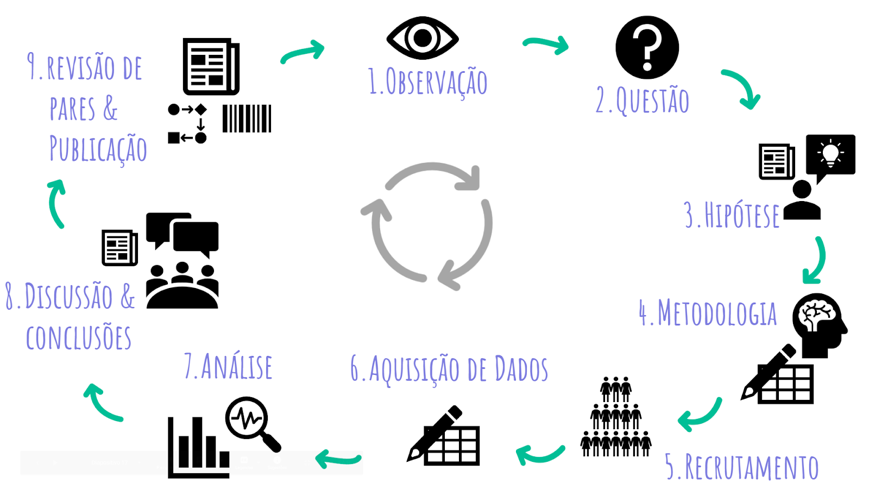

# ***Nesta sessão***

Nesta sessão vamos proceder à análise dos dados adquiridos e vamos fazê-lo de duas formas:

1) Gráficos disponibilizadas pelo [Google Forms](https://docs.google.com/forms/d/14wnvZV35E0GfCYkFZDEJY3L7c55djC5bgvMqxIRZzzk/edit)

2) Gráficos construídos por nós




## Construir gráficos

***Como acham que seria a melhor forma de visualizar (num gráfico) os dados de modo a responder à nossa pergunta de investigação?***

> *Distribuição da cor da roupa pelo estado de espírito*



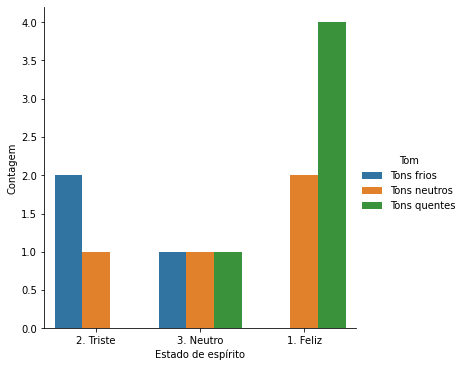

In [4]:
#@title
contagem_column = "Contagem"
df[contagem_column] = 1
df_group = df.groupby(by=["Tom", "Estado de espírito"]).count().reset_index()[["Tom", "Estado de espírito", "Contagem"]]

g = sns.catplot(
    data=df_group, kind="bar",
    x="Estado de espírito", y="Contagem", hue="Tom"
)


***STOP - Paragem para pensar!!***

- O que conseguiram descobrir através deste gráfico?

- Conseguem associar algum tom de roupa a um estado de espírito?

- Haverá uma maneira melhor de apresentar os dados? ou Haverá mais maneiras de visualizar os dados?

- A partir do gráfico conseguem dizer (com certeza) que a nossa hipótese em estudo se verifica? 

## Outros gráficos que podemos fazer







> Distribuição da cor da roupa por género

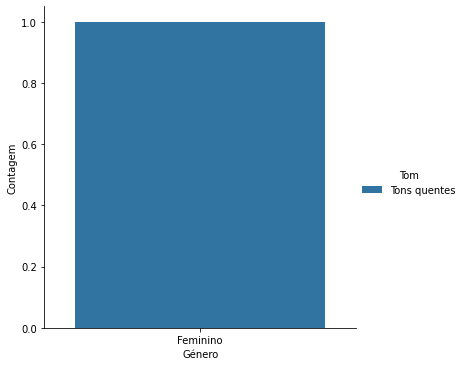

In [ ]:
# @title
contagem_column = "Contagem"
df[contagem_column] = 1
df_group = df.groupby(by=["Tom", "Género"]).count().reset_index()[["Tom", "Género", "Contagem"]]

g = sns.catplot(
    data=df_group, kind="bar",
    x="Género", y="Contagem", hue="Tom"
)





> Distribuição da cor da roupa por idade



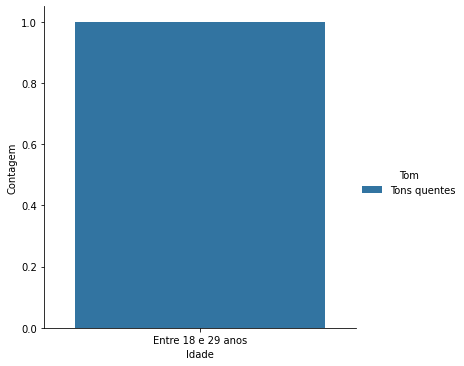

In [ ]:
#@title
contagem_column = "Contagem"
df[contagem_column] = 1
df_group = df.groupby(by=["Tom", "Idade"]).count().reset_index()[["Tom", "Idade", "Contagem"]]

g = sns.catplot(
    data=df_group, kind="bar",
    x="Idade", y="Contagem", hue="Tom"
)

***STOP - Paragem para pensar!!***

- Será que o género tem influência na roupa que os participantes escolhem vestir? E a idade?

- Eram estas as respostas que estavam à espera?

## Condições 

A análise que vimos antes continha todas as respostas, no entanto pode ser benéfico olhar para casos específicos, por exemplo:


> Se uma pessoa tiver predominantemente tons frios no seu guarda roupa, qual será a probabilidade de vestir tons quentes?

Neste caso estamos a olhar para **probabilidades condicionadas**.



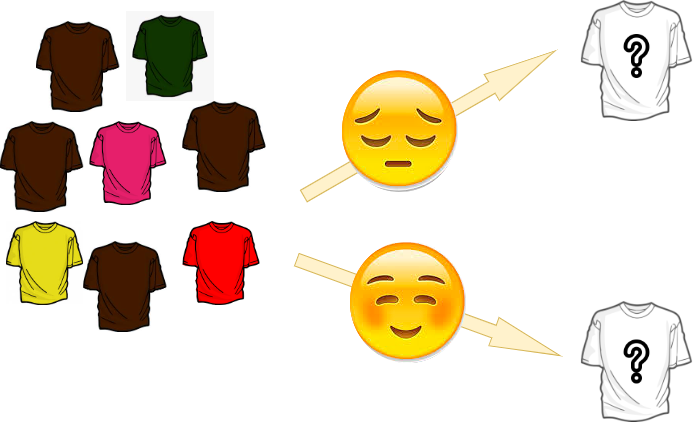

Antes de avançar discute com os teus colegas sobre os resultados expectáveis. O que estão à espera de encontrar? 



> **Nesta célula vão poder interagir e ver quais são as modificações dependendo do guarda roupa dos participantes.**


**Vamos lá!**

In [ ]:
#@title

def plot_interact(armario):

    df_filtered = df.copy()
    df_filtered["selected"] = df_filtered["Armário"].apply(lambda x: armario in x)
    df_filtered = df_filtered[df_filtered["selected"]]
    print(df_filtered[["Tom", "Estado de espírito", "Armário"]].to_markdown())
    df_filtered["Contagem"] = 1

    df_group = df_filtered.groupby(by=["Tom", "Estado de espírito"]).count().reset_index()[["Tom", "Estado de espírito", "Contagem"]]

    g = sns.catplot(
        data=df_group, kind="bar",
        x="Estado de espírito", y="Contagem", hue="Tom"
    )

values_armario = ["Tons frios", "Tons quentes", "Tons neutros"]
interact(plot_interact, armario=values_armario);



interactive(children=(Dropdown(description='armario', options=('Tons frios', 'Tons quentes', 'Tons neutros'), …

***STOP - Paragem para pensar!!***
- Achas que a cor predominante existente no garda-roupa dos participantes tem impacto no que os participantes vão vestir quando estão tristes ou felizes?
- Houve mais alguma conclusão que tiraste do gráfico?



>**Então e têm curiosidade em saber a distribuição das cores que cada género escolhe vestir consoante o estado de espírito?**

Antes de avançar discute com os teus colegas sobre os resultados expectáveis. O que estão à espera de encontrar? 





In [ ]:
#@title

def plot_interact(genero):

    df_filtered = df[df["Género"] == genero]
    df_group = df_filtered.groupby(by=["Tom", "Estado de espírito"]).count().reset_index()[["Tom", "Estado de espírito", "Contagem"]]

    g = sns.catplot(
        data=df_group, kind="bar",
        x="Estado de espírito", y="Contagem", hue="Tom"
    )

values = pd.unique(df["Género"])
interact(plot_interact, genero=values);


interactive(children=(Dropdown(description='genero', options=('Feminino',), value='Feminino'), Output()), _dom…

***STOP - Paragem para pensar!!***

- Notas alguma diferença entre o género masculino e feminino?

- Houve mais alguma conclusão que tiraste do gráfico?

## Testes estatísticos

**Os testes estatísticos dão-nos evidência sobre se determinada hipótese $($$H_0$$)$ pode ser rejeitada com um nível de significância pré-estabelecido (significância estatística).**

Os testes estatísticos são baseados em cálculos que nos vão dar o **valor-p**, quanto menor este valor maior a diferença entre o que estamos a comparar.

No entanto, para saber se a diferença é estatisticamente significativa, temos de **comparar o valor-p  com o nível de significância**. Se o valor for inferior ao limiar rejeitamos $H_0$, caso contrário não.

Os valores pré-estabelecidos que se usam actualmente para o nível de significância são 0.05, 0.01 ou 0.001. Quanto mais baixo for o limiar maior é a probabilidade de rejeitar $H_0$.

Então:

**Se p < 0,05 - rejeitamos $H_0$**

**Se p > 0,05 - não rejeitamos $H_0$**

Os testes estatísticos são feitos sobre a nossa amostra de dados. Se a amostra for representativa, podemos fazer inferência para a população.



> **No nosso caso:**

$H_0$: Pessoas felizes vestem tons frios

$H_1$: Pessoas felizes vestem tons quentes

- queremos comparar 2 grupos de dados que são qualitativos/categóricos e independentes (correspondentes ao estado de espírito feliz+tom quentes e ao estado de espírito feliz+tons frios)

- temos poucos dados 

Devemos usar um teste não paramétrico, neste caso o **$X^2$ (chi-square)**

Este teste avalia a associação existente entre 2 variáveis qualitativas comparando a frequência (contagem) com que aparecem nos resultados.




In [ ]:
#@title
from scipy.stats import chisquare
x = df[(df["Estado de espírito"] == "1. Feliz") & (df["Tom"] == "Tons quentes")]
y = df[(df["Estado de espírito"] == "1. Feliz") & (df["Tom"] == "Tons frios")]

print(f'Frequência de tons quentes: {len(x)}, Frequência de tons frios: {len(y)}')
chisquare([len(x), len(y)])

Frequência de tons quentes: 1, Frequência de tons frios: 0


Power_divergenceResult(statistic=1.0, pvalue=0.31731050786291115)

> **STOP - Paragem para pensar!!!**

Assumindo nível de significância de 0.05, que conclusão podemos tirar tendo em conta o valor-p?




> **E se variarmos a frequência de tons quentes e tons frios que as pessoas felizes vestem? Qual o impacto no valor-p?**

In [ ]:
#@title
from IPython.display import display, Markdown
def test_chi_square(quentes, frios):
  display(Markdown(f'### O valor do p-value foi: {chisquare([quentes, frios]).pvalue}'))

interact(test_chi_square, quentes=widgets.IntSlider(min=5, max=50, step=1, value=10), 
         frios=widgets.IntSlider(min=5, max=50, step=1, value=10));

interactive(children=(IntSlider(value=10, description='quentes', max=50, min=5), IntSlider(value=10, descripti…

> **STOP - Paragem para pensar!!**
 
A que conclusão chegam?









# Discussão

**Variáveis que não estamos a controlar:**
- cor favorita (idealmente devíamos ter uma amostra balanceada de acordo com a cor favorita dos participantes)

- idade (idealmente deveríamos ter uma amostra balanceada de acordo com as idades dos participantes);

- género (idealmente deveríamos ter uma amostra balanceada de acordo com o género dos participantes);

- quem compra a roupa (idealmente deveriam ser os participantes a comprar a sua própria roupa pois se for outra pessoa as escolhas dessa pessoa pode estar a condicionar a escolha da cor da roupa que vestimos);

- estação do ano (sabe-se que no inverno usamos roupa mais escuras, por exemplo; a estação do ano condiciona a cor da roupa que se veste; no entanto esta é uma variável comum a todos os participantes logo o seu impacto é menor);

- actividades específicas no dia do estudo (há actividades que implicam as pessoas irem vestidas de determinada forma/cor, exemplo: escuteiros, karate, etc).

- participantes deveriam ter quer tons quentes como tons frios nos seus armários (se não tiverem a comparação feita acima pode estar enviesada)